# SimpleHabit -  Users review Exploratory Data Analysis (iOS app)

In [82]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
%matplotlib inline

In [179]:
url = 'http://itunes.apple.com/rss/customerreviews/id=1093360165/json'

#resp = requests.get(url=url, params=params)
resp = requests.get(url=url)
resp_json = resp.json() # Check the JSON Response Content documentation below
feed = data['feed']

#while resp_json.get('hasMore') == True:      
#        resp_json = response.json()
#        myList.append(resp_json )

In [180]:
df = json_normalize(feed['entry'])

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
author.label                       50 non-null object
author.name.label                  50 non-null object
author.uri.label                   50 non-null object
content.attributes.type            50 non-null object
content.label                      50 non-null object
id.label                           50 non-null object
im:contentType.attributes.label    50 non-null object
im:contentType.attributes.term     50 non-null object
im:rating.label                    50 non-null object
im:version.label                   50 non-null object
im:voteCount.label                 50 non-null object
im:voteSum.label                   50 non-null object
link.attributes.href               50 non-null object
link.attributes.rel                50 non-null object
title.label                        50 non-null object
dtypes: object(15)
memory usage: 5.9+ KB


In [182]:
df.keys()

Index(['author.label', 'author.name.label', 'author.uri.label', 'content.attributes.type', 'content.label', 'id.label', 'im:contentType.attributes.label', 'im:contentType.attributes.term', 'im:rating.label', 'im:version.label', 'im:voteCount.label', 'im:voteSum.label', 'link.attributes.href', 'link.attributes.rel', 'title.label'], dtype='object')

In [189]:
df.drop(['author.label', 'author.name.label', 'author.uri.label', 'content.attributes.type', 
         'id.label', 'im:contentType.attributes.label', 'im:contentType.attributes.term',
          'im:voteCount.label', 'im:voteSum.label',
         'link.attributes.href', 'link.attributes.rel'], axis=1, inplace=True) 

In [193]:
df.columns = ['review_text', 'rating', 'app_version', 'review_title']

In [212]:
df['rating'] = df['rating'].astype(float)

In [196]:
df.head()

,review_text,rating,app_version,review_title
0,I thinku need to put a medatation for deployment in here i will keep leaving bad reveiws and coments every day untill you notify me that you will be doing a seiries in deploymen preferably by Cory Muscara thx\n\nPs. Plz plz plz plz plz plz plz plz plz plz plz plz plz plz plz plz plz plz bye\n\nPs.ps im not kidding about the bad reviews thing \n\nBYE,1,4.29.1,No deployment
1,They have a series for kids who don’t sleep how convenient is that!,5,4.29.1,Kids
2,"I subscribed and then unsubscribed. I want to use it for a month. The app and meditations are the best compared to any other app I have used, but the price is ABSOLUTELY RIDICULOUS. If it was $4 or $5 I would keep it ever. But it’s hard justify paying $11.99 (the same price of Netflix or Spotify) for an app I am only using 5-10 min a day. At least, with Netflix I am using it several hours a month.",1,4.29.1,"Great, but way too expensive"
3,I have a hard time sleeping. I just think too much then I’m up worrying about stuff that happened a long time ago. I just don’t let go of anything and this app helped me and I do a session of it every night Bc I usually go to sleep at like 2:30 and I actually go to sleep and this really helps me get a rest because on my own I can’t then I get in trouble from my mom for being up all night then i go to sleep in school and the teachers call my mom and I get my phone tooken away or something,3,4.29.1,This app
4,"I like this app a lot. I think the premium membership is a bit pricey but I guess it depends on how much you use it. I think the amount of free lessons are fair, but the only downside to that is that some of the unguided therapy sessions still cost money, which I think is a joke. Other than that, great app that I recommend to anyone willing to try meditation.",5,4.29.1,I Like the app


# Wordcloud utility function

In [232]:
from wordcloud import WordCloud, STOPWORDS
#import matplotlib.pyplot as plt

def plot_word_cloud(text):
    """
    text: np array of strings 
    """
    #text = df['content.label'].values
    wordcloud = WordCloud(
        width = 2500,
        height = 1500,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [194]:
df.keys()

Index(['review_text', 'rating', 'app_version', 'review_title'], dtype='object')

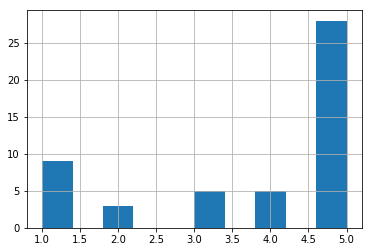

In [230]:
#df['rating'].hist( by =df.app_version);
df['rating'].hist();

In [109]:
good_rating_filter = df['im:rating.label'] > 2.5

In [154]:
pd.set_option('display.max_colwidth', -1)

# Word cloud of ratings > 2.5

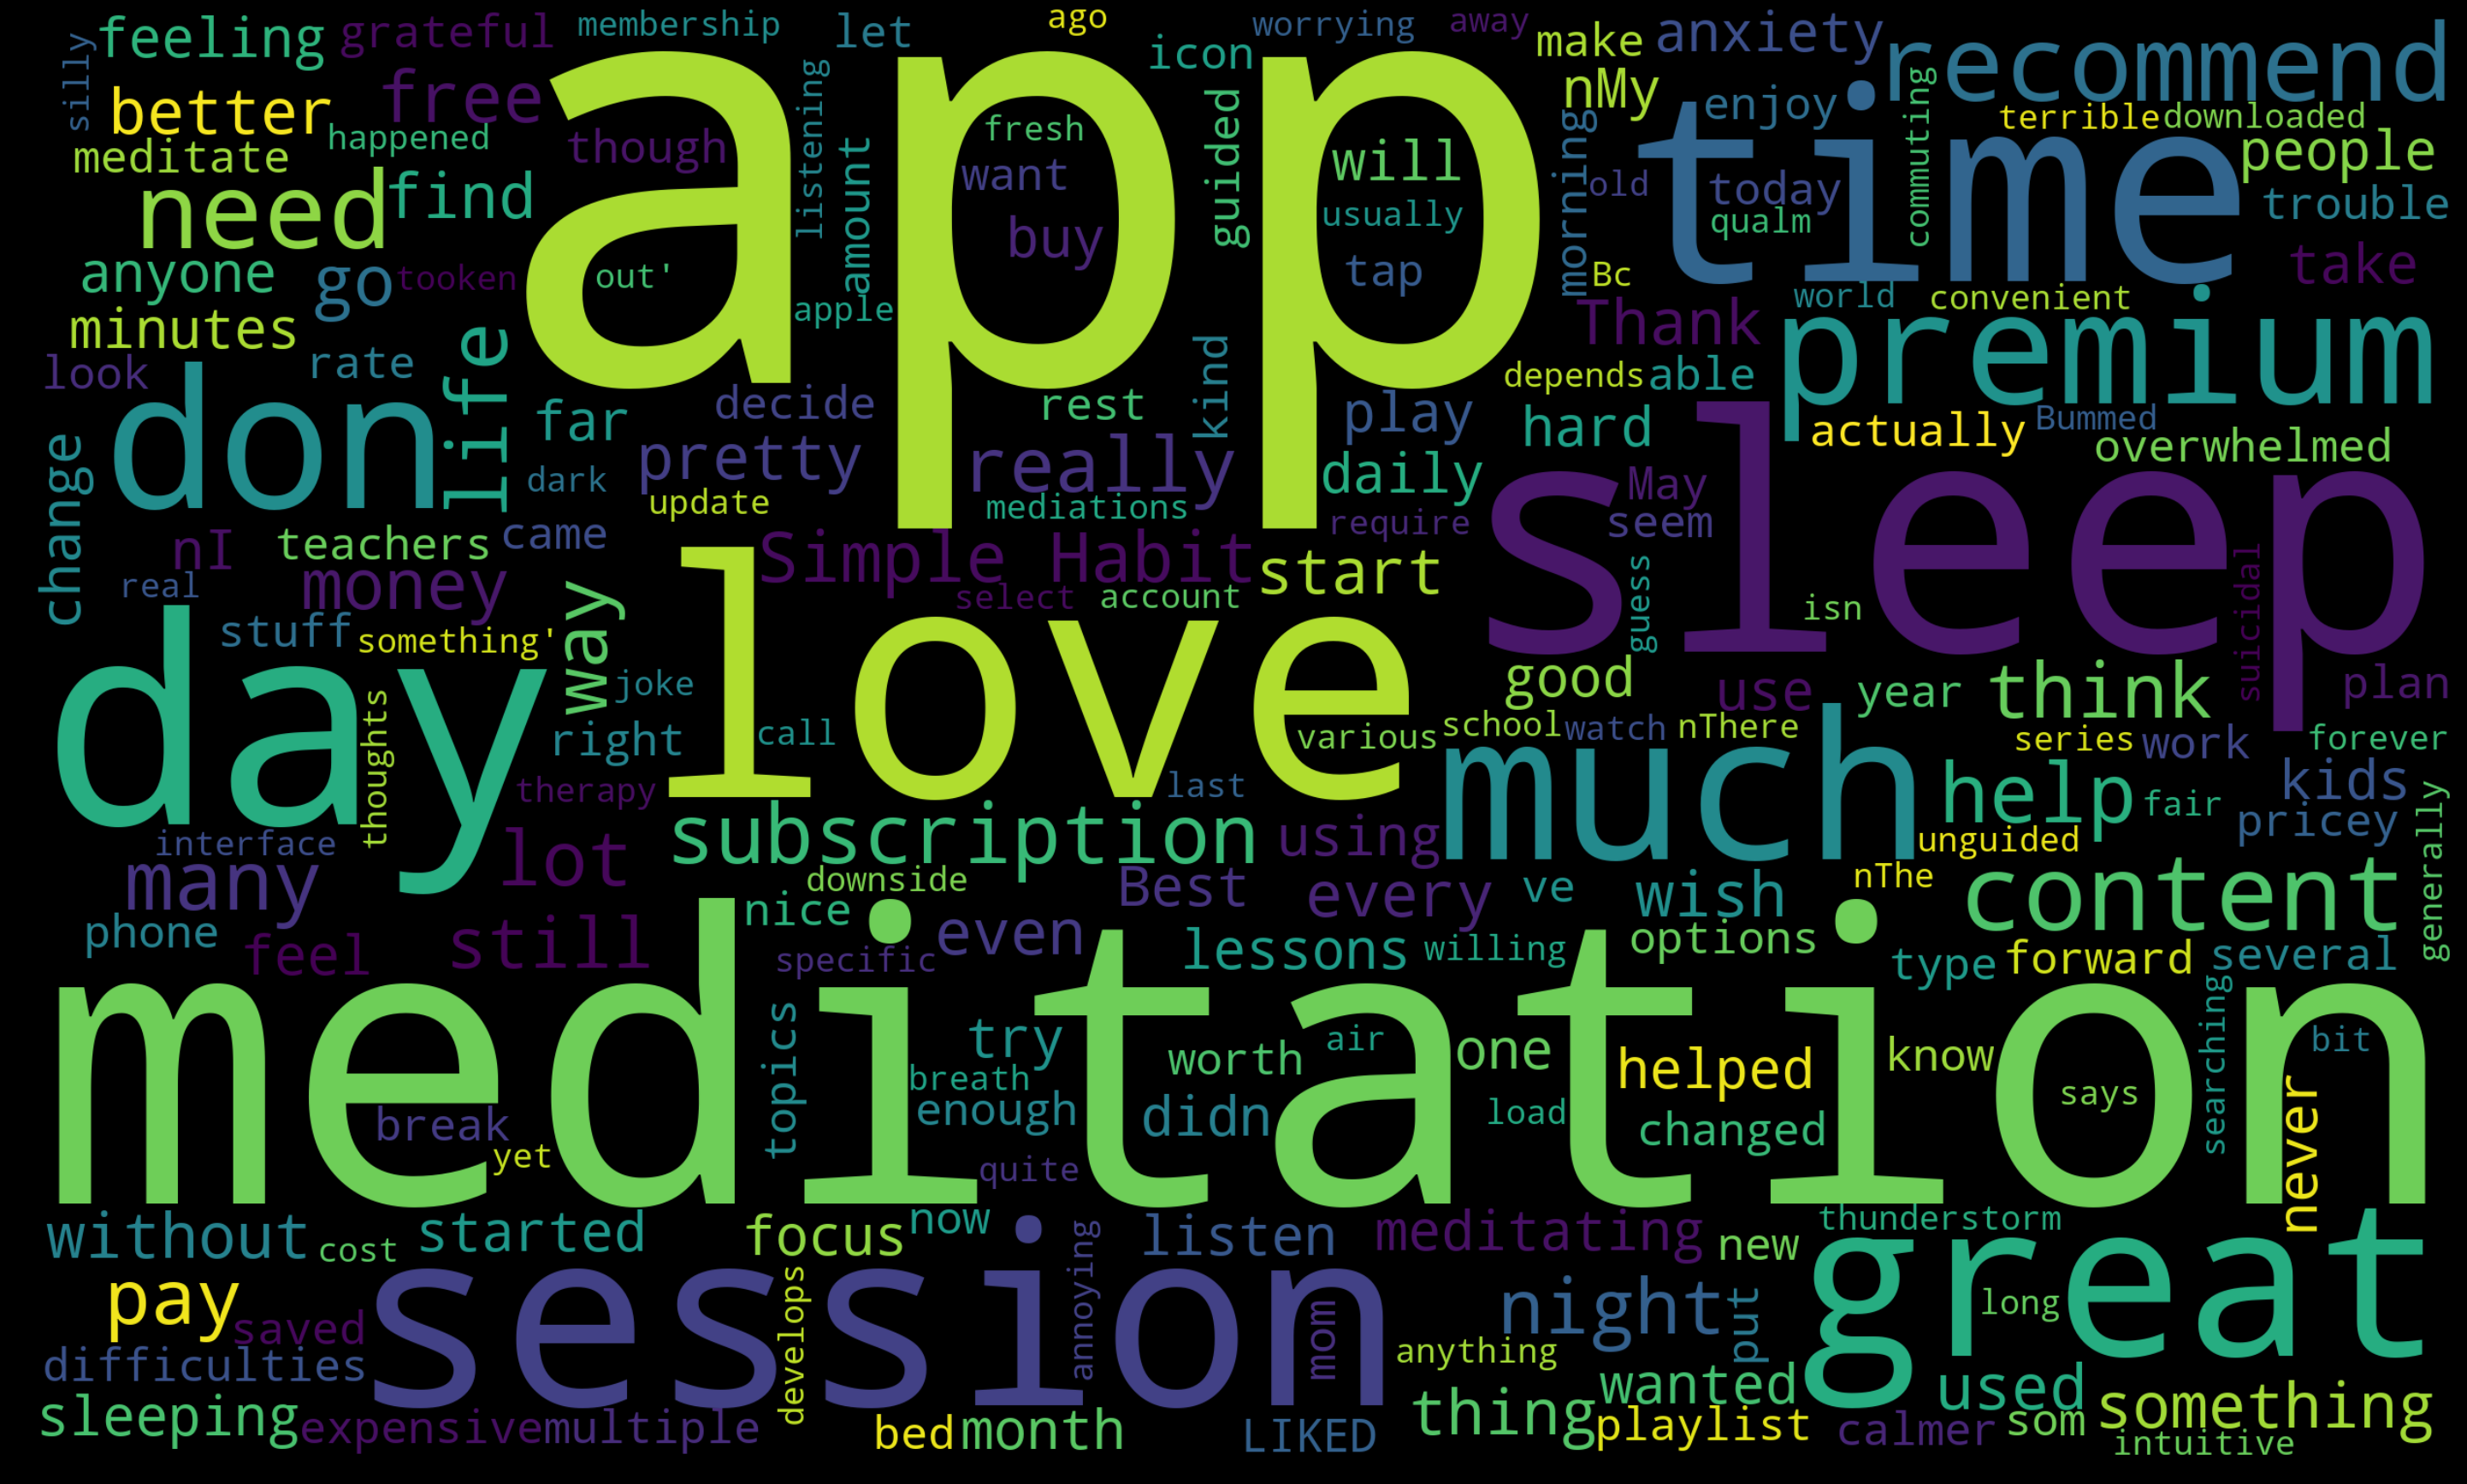

In [233]:
plot_word_cloud(df[good_rating_filter]['review_text'].values)

# A few reviews with ratings > 2.5

In [197]:
df[good_rating_filter][['review_title', 'review_text', 'rating']].head().sort_values(by='rating', ascending=False)

,review_title,review_text,rating
1,Kids,They have a series for kids who don’t sleep how convenient is that!,5
4,I Like the app,"I like this app a lot. I think the premium membership is a bit pricey but I guess it depends on how much you use it. I think the amount of free lessons are fair, but the only downside to that is that some of the unguided therapy sessions still cost money, which I think is a joke. Other than that, great app that I recommend to anyone willing to try meditation.",5
5,Daily go to!,Any plans to develops an app for apple watch?,5
3,This app,I have a hard time sleeping. I just think too much then I’m up worrying about stuff that happened a long time ago. I just don’t let go of anything and this app helped me and I do a session of it every night Bc I usually go to sleep at like 2:30 and I actually go to sleep and this really helps me get a rest because on my own I can’t then I get in trouble from my mom for being up all night then i go to sleep in school and the teachers call my mom and I get my phone tooken away or something,3
8,Way worse after the update,I used to love this app but the update is terrible! Takes forever to load and hard to find my old content. Bummed out,3


# Word cloud of poor ratings ( < 2.5)

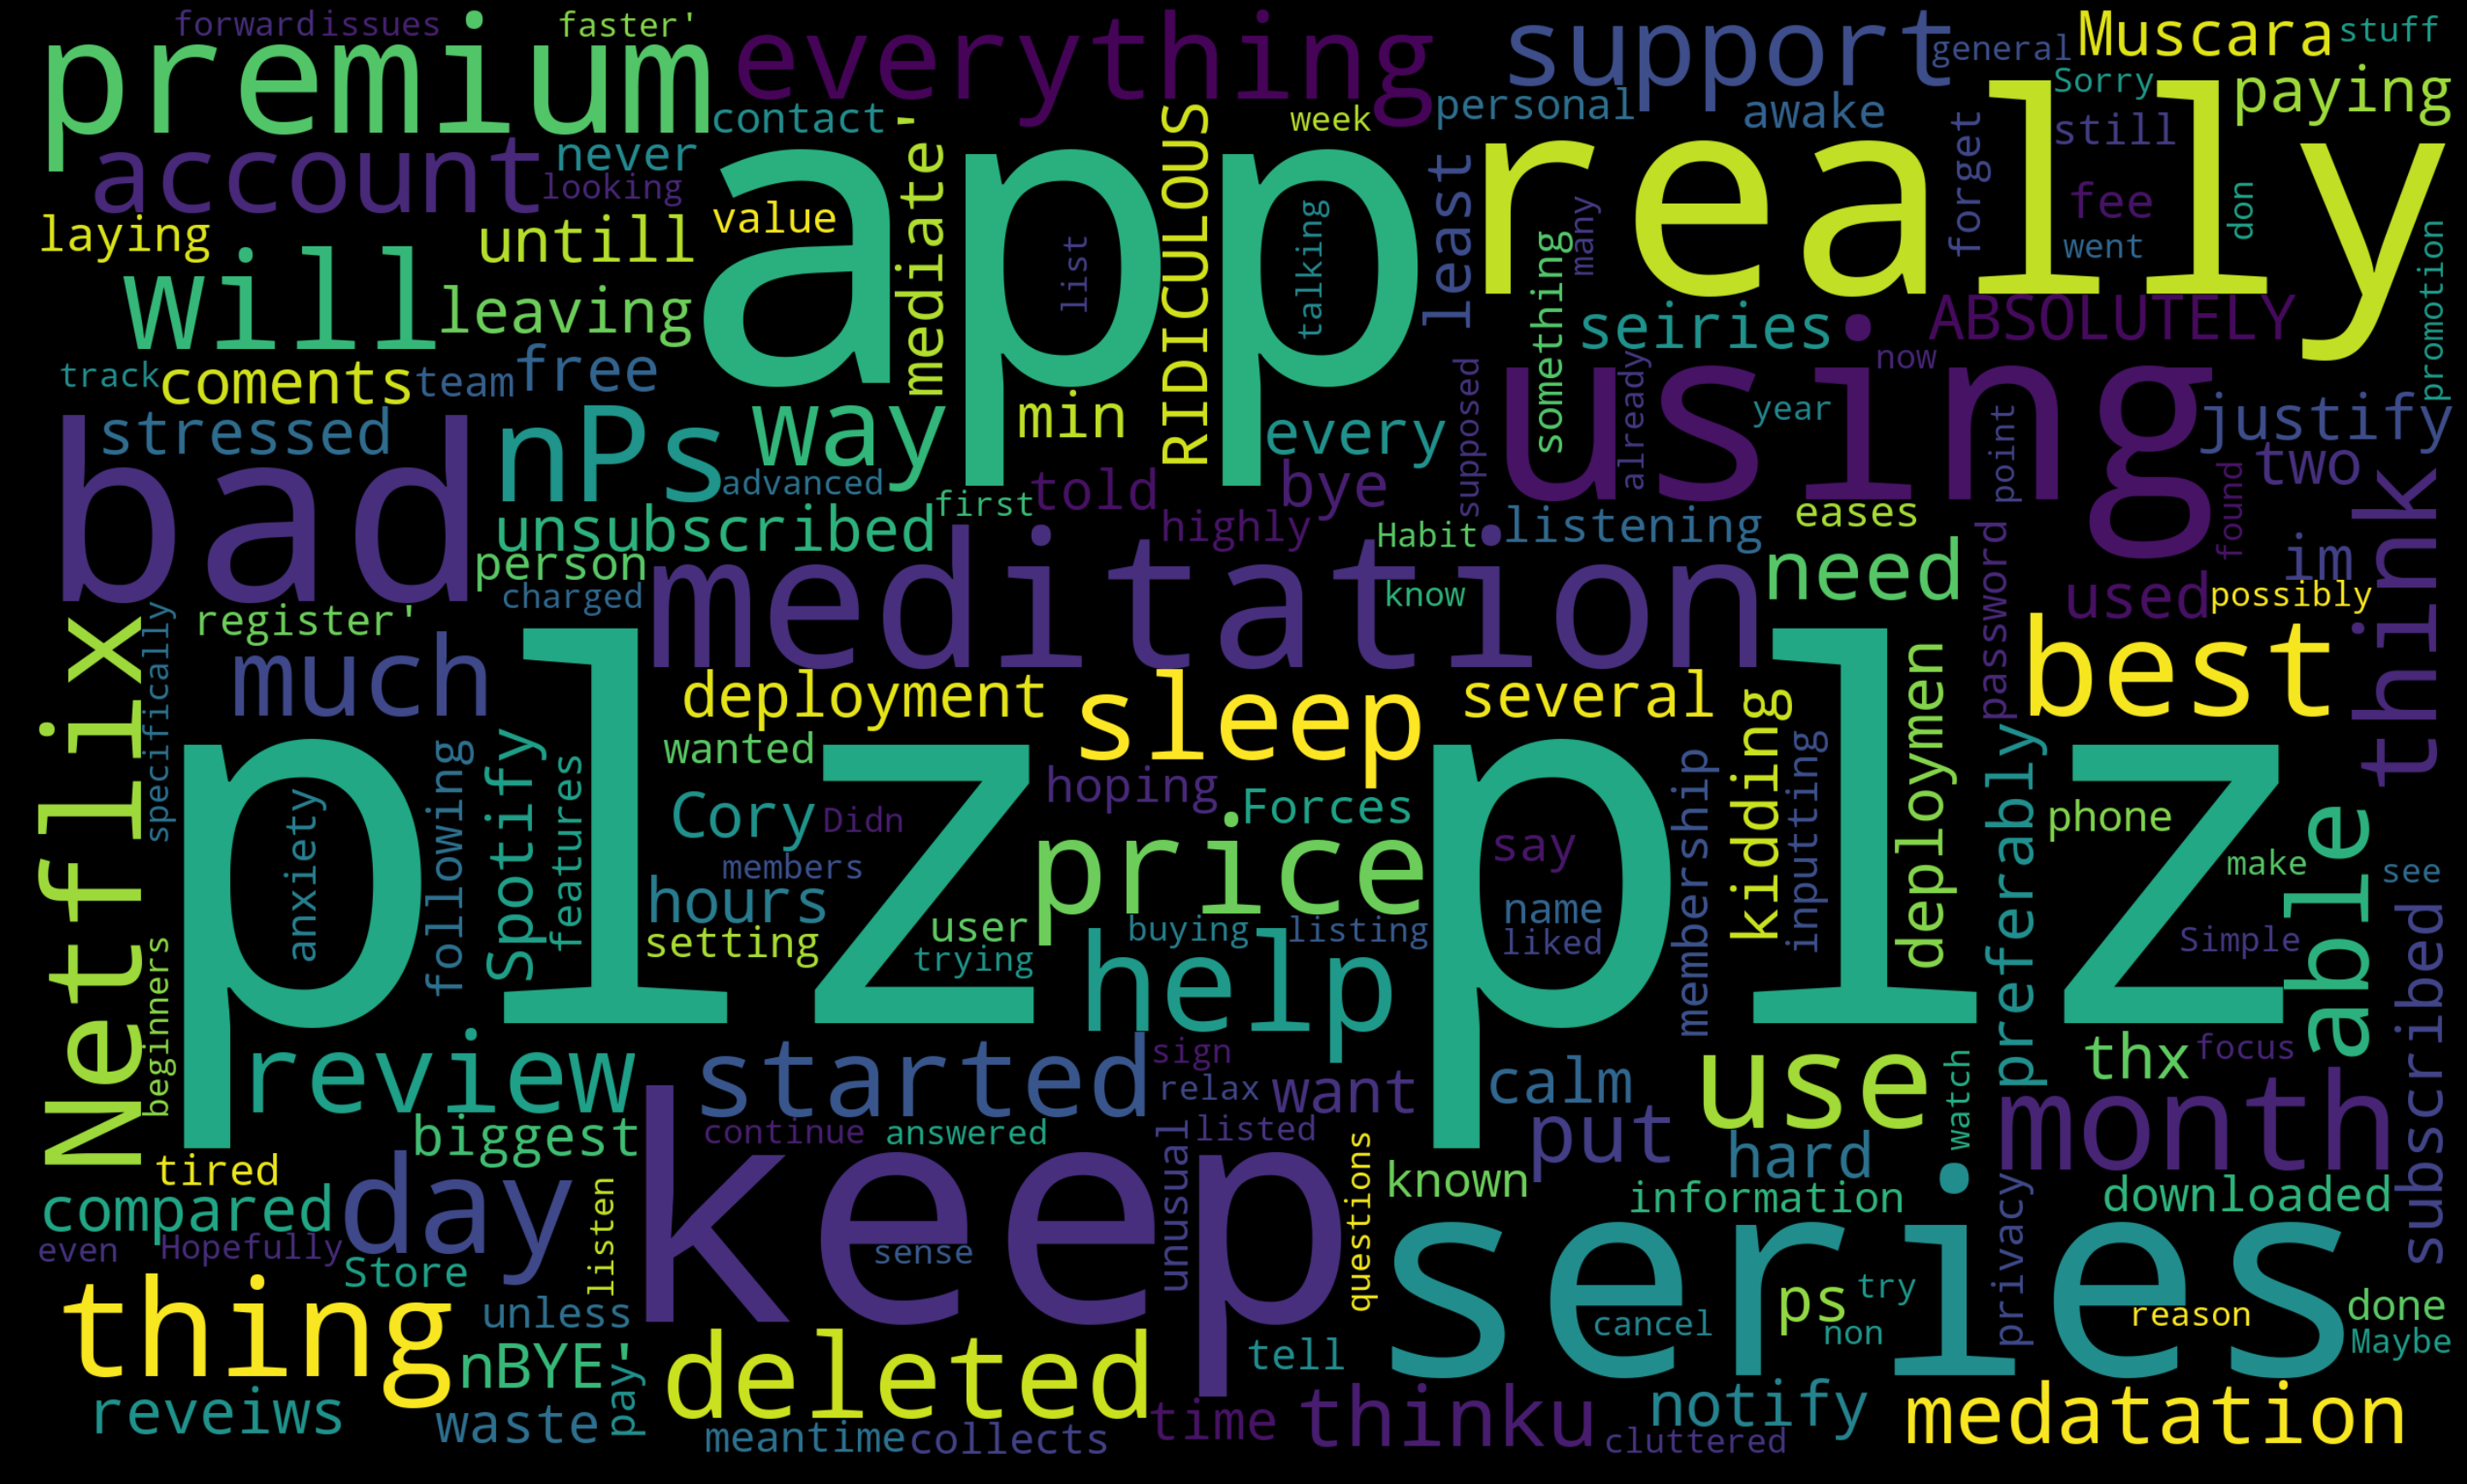

In [234]:
plot_word_cloud(df[~good_rating_filter]['review_text'].values)

# A few reviews with ratings <= 2.5

In [198]:
df[~good_rating_filter][['review_title', 'review_text', 'rating']].head().sort_values(by='rating', ascending=False)

,review_title,review_text,rating
6,Don’t get the app,I am not calm I am stressed because there’s only two things that are free and I can not mediate,2
0,No deployment,I thinku need to put a medatation for deployment in here i will keep leaving bad reveiws and coments every day untill you notify me that you will be doing a seiries in deploymen preferably by Cory Muscara thx\n\nPs. Plz plz plz plz plz plz plz plz plz plz plz plz plz plz plz plz plz plz bye\n\nPs.ps im not kidding about the bad reviews thing \n\nBYE,1
2,"Great, but way too expensive","I subscribed and then unsubscribed. I want to use it for a month. The app and meditations are the best compared to any other app I have used, but the price is ABSOLUTELY RIDICULOUS. If it was $4 or $5 I would keep it ever. But it’s hard justify paying $11.99 (the same price of Netflix or Spotify) for an app I am only using 5-10 min a day. At least, with Netflix I am using it several hours a month.",1
7,Meditation doesn’t help you sleep,"This has been the biggest waste of time. I was told meditation would help me sleep, but all it did was keep me up listening to this person and following what they say just to keep laying there awake, hoping that I could sleep.",1
24,NOT A FREE APP,This app has a $99.95 membership fee. If i had known that i would have never downloaded.,1


In [203]:
# Review length
df['review_length'] = df['review_text'].str.len()

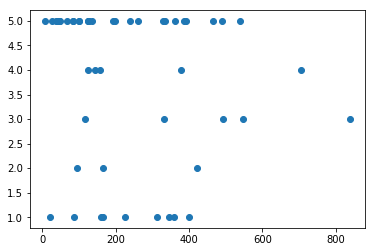

In [236]:
plt.scatter(df.review_length , df.rating)

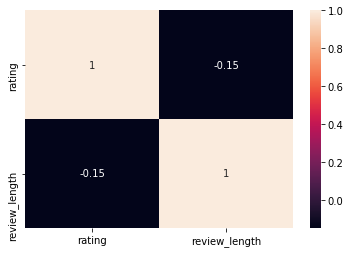

In [214]:
sns.heatmap(df.corr(), annot=True)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
review_text      50 non-null object
rating           50 non-null float64
app_version      50 non-null object
review_title     50 non-null object
review_length    50 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.0+ KB


# App version vs ratings

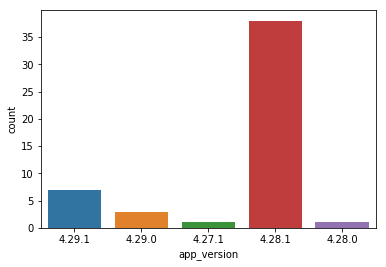

In [219]:
sns.countplot(x='app_version', data=df);

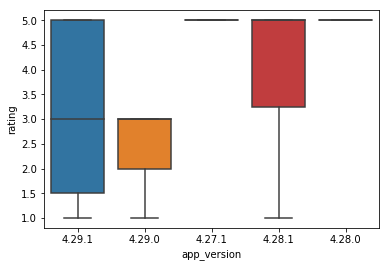

In [221]:
sns.boxplot( x = 'app_version', y='rating', data = df);

In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

dataset =  df['review_text']


In [242]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(dataset)


Extracting tf-idf features for NMF...


In [243]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(dataset)

Extracting tf features for LDA...


In [244]:
# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, n_features=%d..." % (n_features))

nmf = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)

Fitting the NMF model (Frobenius norm) with tf-idf features, n_features=1000...


In [245]:
print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (Frobenius norm):
Topic #0: app support anxiety deleted like watch hopefully helped did grateful 99 lot best month highly hard wanted using downloaded membership
Topic #1: life break help app time using rest daily best simple started just hard need support day guided habit year grateful
Topic #2: love feeling topics used takes kids overwhelmed listening hard sessions content app look habit simple day ve needs forward year
Topic #3: sleep night series time kids don help better just thx app change lessons meditation sleeping hoping listening biggest person didn
Topic #4: sorry just min review bad maybe way started hard great having habit guided grateful helped good free forward focus feeling
Topic #5: premium think meditation try pay use content money great really app don lot like tell free wish members pretty subscription
Topic #6: work lessons pay tap thank people meditation overwhelmed listening topics kids feeling year guided habit grateful great good free forwar

In [249]:
nmf.components_

array([[3.12372741e-02, 7.53183712e-13, 8.89993171e-02, ...,
        0.00000000e+00, 2.54252432e-11, 4.53374977e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.95340752e-02],
       ...,
       [0.00000000e+00, 6.31207889e-02, 8.18115500e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.80054807e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.64036252e-02, 1.79710131e-12, ...,
        1.26937943e-01, 6.09757759e-02, 0.00000000e+00]])

In [247]:
# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features and n_features=%d..."
      % (n_features))

nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features and n_features=1000...

Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: like app free think don things premium know membership downloaded love lot really meditation calm pretty money make try great
Topic #1: app time support life break like watch phone help just deleted hard hopefully rest did using helped started teachers really
Topic #2: love feeling simple using topics daily life look app habit best rest forward ve relax year needs help meditations focus
Topic #3: sleep meditation time better account don didn series kids focus sleeping biggest able just tap help play night person simple
Topic #4: just way sorry recommend nice meditating review really min bad guided listen maybe daily sessions minutes highly buy look want
Topic #5: need meditation day pay premium tell good people use content far time try apps meditations hoping feel able came wish
Topic #6: great thank subscr

In [248]:
print("Fitting LDA models with tf features, n_features=%d..." % ( n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Fitting LDA models with tf features, n_features=1000...
done in 0.071s.

Topics in LDA model:
Topic #0: 100 biggest use support play 99 listening membership options recommend time buy bad buying takes meditations came hoping change helps
Topic #1: series content like account sleep meditation don app simple pretty habit premium meditations able used really ve doing people absolutely
Topic #2: app sleep love like great meditations just money think anxiety subscription time lot don hard premium free 99 phone helped
Topic #3: really premium like forward try listen make watch didn liked don started members meditation app know think 99 stuff takes
Topic #4: bad thing daily thx rest need muscara best simple life day using doing cory start great want able night meditate
Topic #5: day app sessions meditation sleep didn night love life premium just pay far way content recommend habit changed simple change
Topic #6: meditation wish app sleep biggest liked way just did nice really month time actua

In [250]:
df.to_csv("simple_habit_ios_review.csv", index = False)

In [251]:
!ls

notebook.tex	 output_26_1.png  simple_habit_ios_review.csv
output_14_1.png  output_27_1.png  simple_habit_review_analysis.ipynb
output_22_0.png  output_30_0.png
output_24_0.png  output_31_1.png


In [253]:
#!cat simple_habit_ios_review.csv